In [1]:
import pandas as pd
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import seaborn as sns

In [2]:
# Load movie ratings data (small set)
df_movies = pd.read_csv('ml-latest-small/movies.csv')
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
df_tags = pd.read_csv('ml-latest-small/tags.csv')
df_links = pd.read_csv('ml-latest-small/links.csv')

unique_CS=pd.read_csv('ml-latest-small/unique_CS.csv')

In [3]:
data=pd.merge(df_ratings,df_movies,on='movieId')

In [4]:
#new column with mean rating per movie
def calculate_weighted_rank(data,m=100):
    data['av_rating']=data.groupby(['movieId'])['rating'].transform('mean')
#new column with number of ratings per movie
    data['no_of_ratings']=data.groupby(['movieId'])['rating'].transform('count')  
    # new column with ranking of movie according to weighted_rank()
    v = data['no_of_ratings']
    R = data['av_rating']
    C = data['rating'].mean()
    #m = 100.0 
    def weighted_rank(R, v, C, m):
        return R * v / (v+m) + C * m / (v+m)   
    data['weighted_rank']=weighted_rank(R,v,C,m) # use function from above as input for new column/variable
    return data
#df_ratings['weighted_rank']=R * v / (v+m) + C * m / (v+m) # using this would have the same result

In [5]:
data=calculate_weighted_rank(data,m=100)

In [6]:
#data[['movieId','weighted_rank']].sort_values('weighted_rank')['movieId'].unique()[0:100]

In [6]:
# create keys for dict
movie_list=pd.DataFrame(set(data[['movieId','weighted_rank']].sort_values('weighted_rank')['movieId'].unique()[0:100]),columns=['movieId']).sort_values('movieId')
movie_list=list(movie_list['movieId'])

In [7]:
#movie_list

In [8]:
# create dict for movie names
movie_names_dict=dict(zip(data['movieId'],data['title']))

In [9]:
# create values for dict
users_list=[]
for i in movie_list:
    users_list.append(list(data[data['movieId']==i]['userId']))

In [10]:
# create dict for users per movie: key: movie; values: users
movies_users_dict=dict(zip(movie_list,users_list))

In [36]:
g=nx.Graph()
edge_attribute_dict={}

In [37]:
for movie, users in movies_users_dict.items(): # use .items() to iterate through dictionary
    g.add_node(movie)
    for user in users:
       # if title in title_IDs:
        for movie2, users2 in movies_users_dict.items():
            if (user in users2) and (users2 != users):
                g.add_edge(movie,movie2)
                name_movie_tuple=tuple(sorted((movie,movie2)))
                if name_movie_tuple not in edge_attribute_dict:
                    edge_attribute_dict[name_movie_tuple]=1
                else:
                    edge_attribute_dict[name_movie_tuple]+=1

In [38]:
#movies_users_dict.items()
#movies_users_dict
#edge_attribute_dict

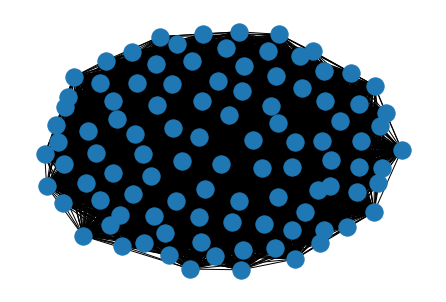

In [39]:
nx.draw(g)

In [40]:
for k,v in edge_attribute_dict.items(): # create dict in dict
    edge_attribute_dict[k]={'weight':v}

nx.set_edge_attributes(g,edge_attribute_dict)

In [41]:
#edge_attribute_dict

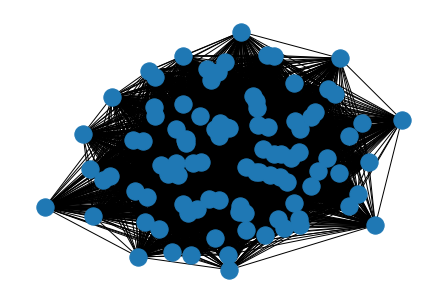

In [44]:
nx.draw(g)

In [47]:
centrality=nx.degree_centrality(g)
#[(movie_names_dict[x],centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

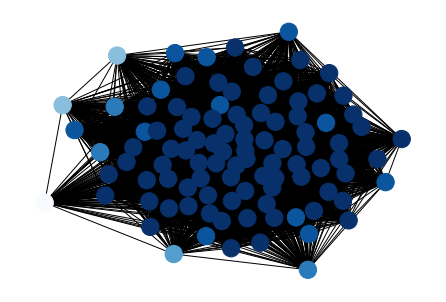

In [57]:
pos=nx.spring_layout(g,k=1,iterations=20)
max_c=max(centrality.values())
color_map={x[0]:x[1]/max_c for x in centrality.items()}
nx.draw(g,pos,node_color=list(color_map.values()),cmap=plt.cm.Blues)
plt.show()

In [261]:
Centr_set=list(set(centrality))

In [64]:
CS_set=list(unique_CS['movieId'])

In [267]:
# check if values are in two lists and return TRUE/FALSE into list

check=[]
for i in CS_set:
    if i in Centr_set:
        a=(True,i)
        check.append(a)
    else: 
        a=(False,i)
        check.append(a)

In [270]:
check=pd.DataFrame(check)

In [192]:
c# Count freq for each unique value
#check.value_counts()

In [301]:
# drop column
unique_CS.drop('centrality',axis=1,inplace=True)

In [238]:
centrality[unique_CS.iloc[1009]['movieId']]

0.8868868868868869

In [239]:
unique_CS.loc[unique_CS['movieId']==1009,'centrality']

Series([], Name: centrality, dtype: float64)

In [302]:
for i in check.index: 
    if check[0][i]==True:
        unique_CS.loc[unique_CS['movieId']==check[1][i],'centrality']=centrality[check[1][i]]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


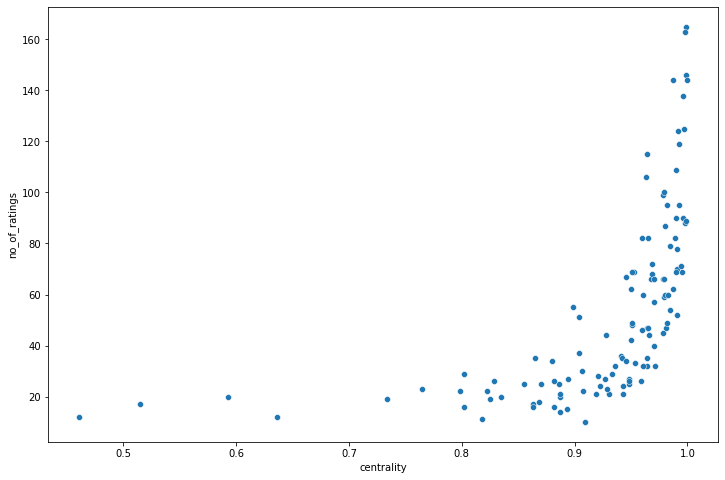

In [319]:
plt.figure(figsize=(12,8))
sns.scatterplot(unique_CS['centrality'],unique_CS['no_of_ratings'])
#names=['before Sim.','after CS Sim.']
#plt.legend(labels=names)
#plt.xlim(0.4,5.3)
plt.show()
plt.close()

In [323]:
#centrality

In [329]:
unique_CS.sort_values(by='centrality',ascending=False).head(20)

,Unnamed: 0,movieId,av_rating,no_of_ratings,weighted_rank,centrality
655,102772,2628,3.107143,144,3.276283,1.000000
44,100884,367,3.184713,165,3.311178,0.998999
442,101842,500,3.388889,146,3.442123,0.998999
769,103464,2012,3.369318,89,3.448962,0.998999
578,102433,1391,3.093023,88,3.320057,0.997998
391,101620,344,3.040373,163,3.222682,0.997998
116,100978,2683,3.198347,125,3.341235,0.996997
472,101944,153,2.916058,138,3.169751,0.995996
520,102128,19,2.727273,90,3.144416,0.995996
171,101074,1380,3.139706,69,3.364641,0.994995
